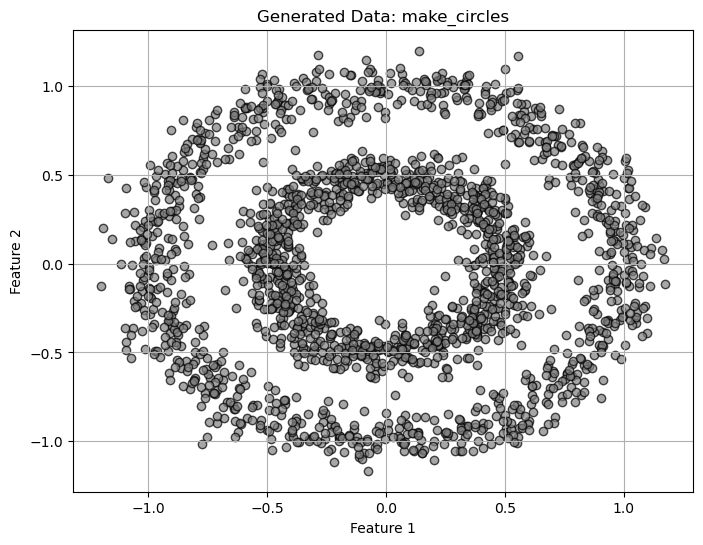

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# 데이터 생성
X, y = make_circles(n_samples=2000, shuffle=True, factor=0.5, noise=0.08, random_state=42)

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.7, edgecolor='k')
plt.title("Generated Data: make_circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [3]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성
dbscan = DBSCAN(eps=0.1, min_samples=10)  # eps: 반경, min_samples: 최소 이웃 개수

# 군집화 수행
labels = dbscan.fit_predict(X)  # X는 make_moons로 생성된 데이터

# 군집 레이블 확인
print("Cluster Labels:", labels)

Cluster Labels: [0 1 0 ... 1 0 0]


In [5]:
# 고유 값과 개수 계산
unique_values, counts = np.unique(labels, return_counts=True)

# 결과 출력
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")

Value: -1, Count: 18
Value: 0, Count: 997
Value: 1, Count: 985


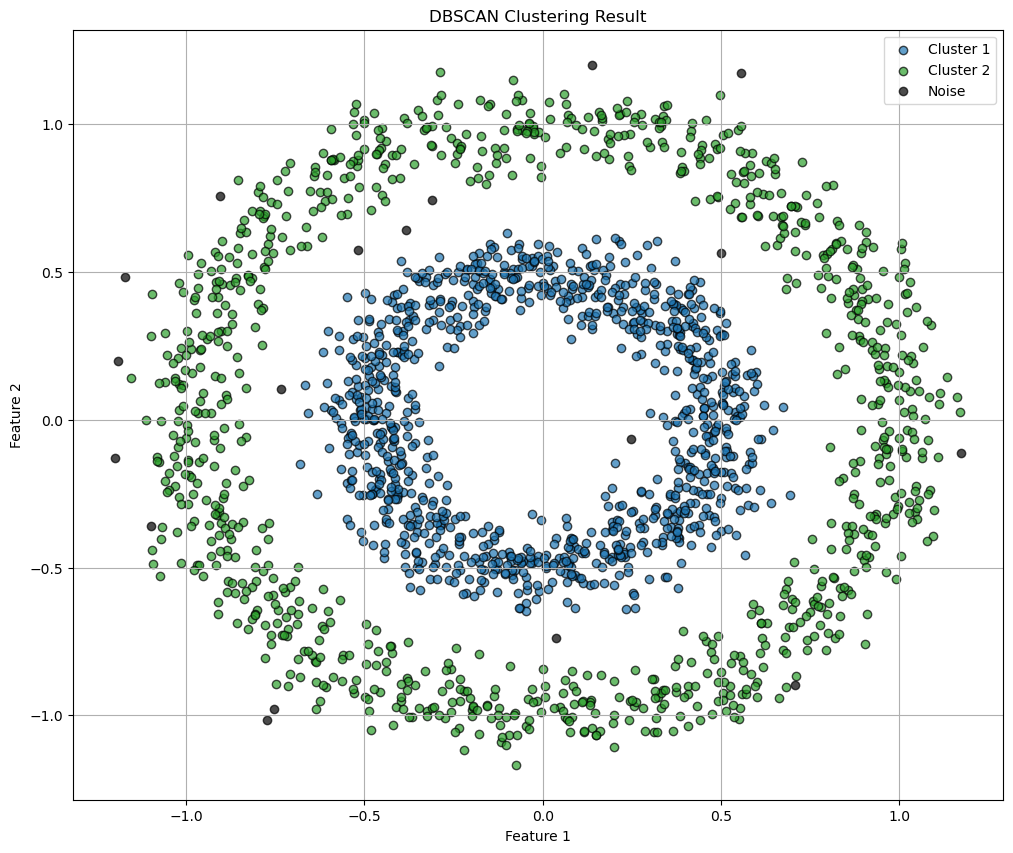

In [7]:
import matplotlib.pyplot as plt

# 4. DBSCAN 결과 시각화
plt.figure(figsize=(12, 10))
unique_labels = set(labels)  # 고유한 레이블 추출

for label in unique_labels:
    # 노이즈 처리
    if label == -1:
        color = "black"
        label_name = "Noise"
    else:
        color = plt.cm.tab10(label / (len(unique_labels) + 1))  # 색상 설정
        label_name = f"Cluster {label + 1}"  # 군집 이름 설정
    
    # 각 군집에 해당하는 데이터 시각화
    plt.scatter(
        X[labels == label, 0],
        X[labels == label, 1],
        c=[color],
        label=label_name,
        alpha=0.7,
        edgecolor="k"
    )

plt.title("DBSCAN Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
